# Q2

                              name dastgah instrument  zero_corssing  \
0         ney-mahoor-ebrahimi .mp3     D_2        I_4          65545   
1  Mohammad_Shojaei_nei_Mahoor.mp3     D_2        I_4          59788   
2      Arash_Samimi_nei_Mahoor.mp3     D_2        I_4          85072   
3          19 sarebaang mahoor.mp3     D_2        I_4          89980   
4                     Amjadian.mp3     D_2        I_4          58134   

   spectral_centroid_mean  spectral_centroid_var  spectral_rolloff_mean  \
0             1938.040517            303472.4474            2815.166310   
1             1956.981873            774951.2677            2971.032035   
2             2735.525193            575671.7929            4268.615855   
3             2629.389833            406198.9319            4071.233715   
4             1659.262559            332341.1003            2789.041468   

   spectral_rolloff_var  chroma_1_mean  chroma_2_mean  ...  mfcc_11_var  \
0          1.754412e+06       0.515210   

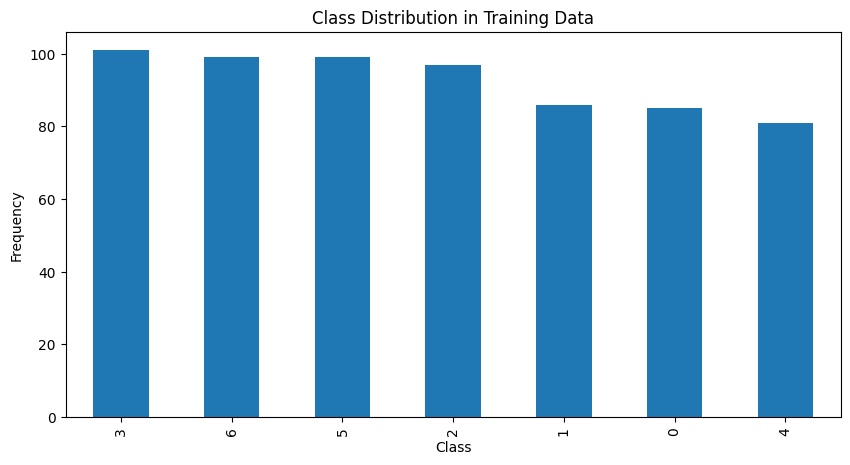

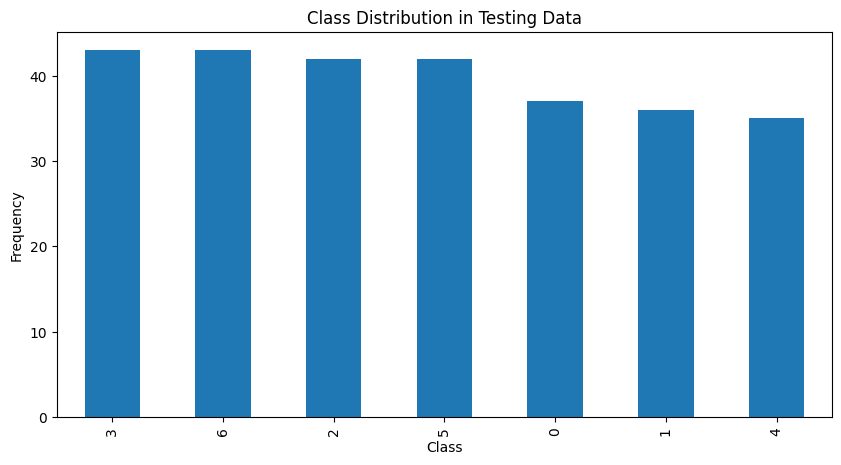

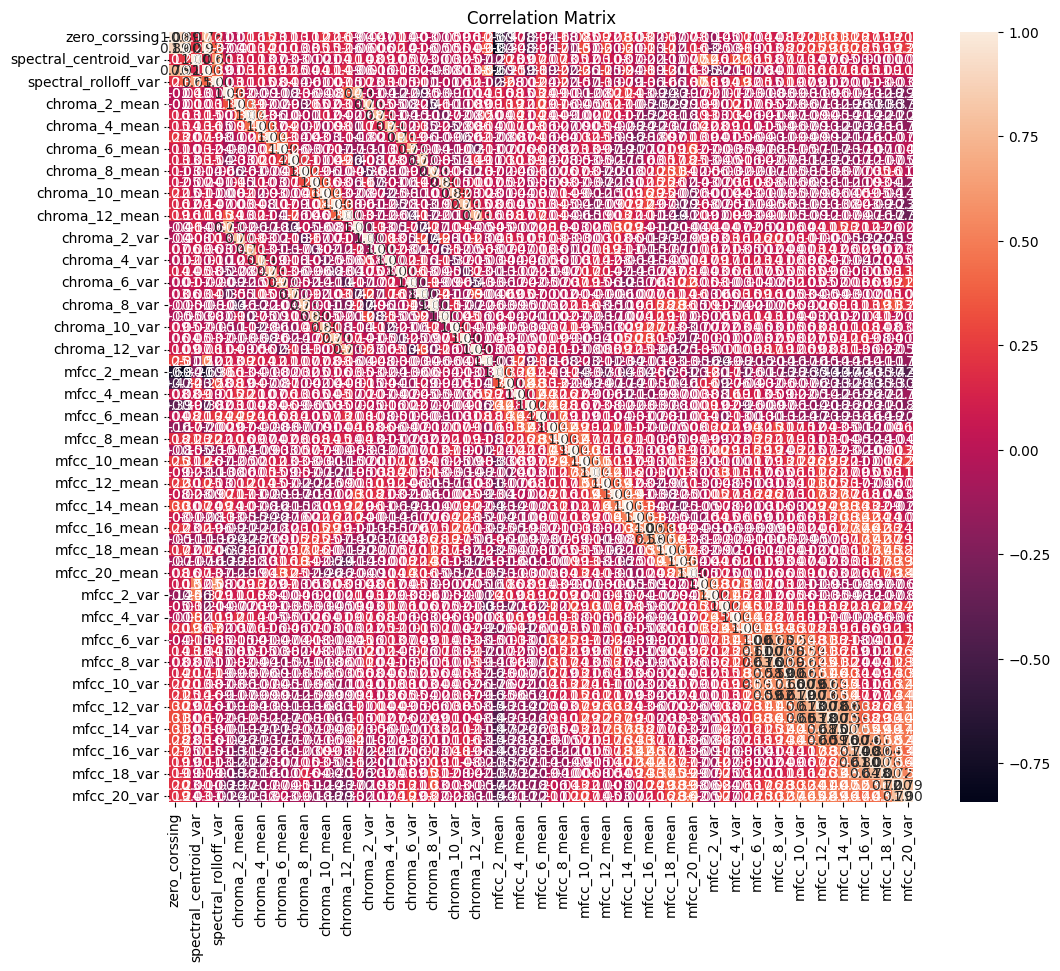

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

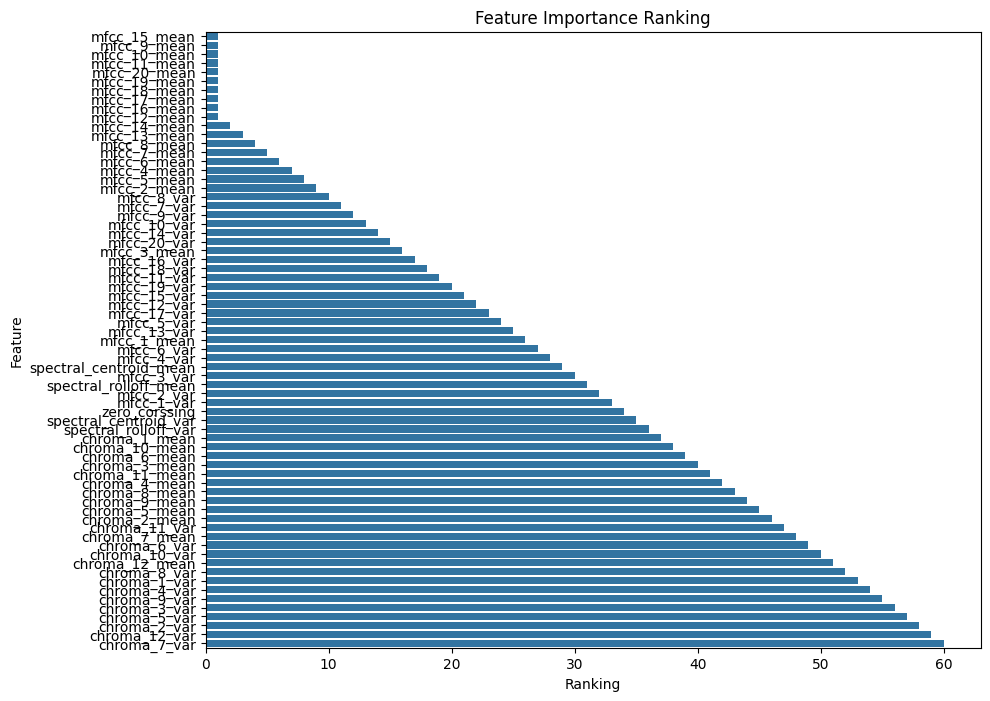

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Convert categorical variables to numeric if necessary
# Assume 'dastgah' is the target and the rest are features
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Split the data into training and testing sets
train_data, test_data = train_test_split(numeric_data, test_size=0.3, random_state=42, stratify=numeric_data['dastgah'])

# Display class distribution for training data
plt.figure(figsize=(10, 5))
train_data['dastgah'].value_counts().plot(kind='bar', title='Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Display class distribution for testing data
plt.figure(figsize=(10, 5))
test_data['dastgah'].value_counts().plot(kind='bar', title='Class Distribution in Testing Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Select only numerical features for correlation matrix
numerical_features = train_data.drop('dastgah', axis=1)

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Selecting important features using Recursive Feature Elimination (RFE)
X = train_data.drop('dastgah', axis=1)
y = train_data['dastgah']

# Initialize the model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
fit = rfe.fit(X, y)

# Display the ranking of features
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})
feature_ranking = feature_ranking.sort_values(by='Ranking')

# Plot the top features
plt.figure(figsize=(10, 8))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking)
plt.title('Feature Importance Ranking')
plt.show()


B

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Split the data into training and testing sets
train_data, test_data = train_test_split(numeric_data, test_size=0.3, random_state=42, stratify=numeric_data['dastgah'])

X_train = train_data.drop('dastgah', axis=1)
y_train = train_data['dastgah']
X_test = test_data.drop('dastgah', axis=1)
y_test = test_data['dastgah']


In [ ]:
# Train SVM with linear kernel
linear_svm = SVC(kernel='linear', probability=True)
linear_svm.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_svm.predict(X_test)

# Compute confusion matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print("Classification Report - Linear Kernel")
print(classification_report(y_test, y_pred_linear, target_names=LabelEncoder().inverse_transform(range(7))))


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', probability=True)
rbf_svm.fit(X_train, y_train)

# Predict on test data
y_pred_rbf = rbf_svm.predict(X_test)

# Compute confusion matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RBF Kernel')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fit LabelEncoder on training labels
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

# Get class names from LabelEncoder and convert to strings
class_names = list(map(str, label_encoder.classes_))

# Classification report
print("Classification Report - RBF Kernel")
print(classification_report(y_test, y_pred_rbf, target_names=class_names))


D

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK"
data = pd.read_csv(url)

# Convert categorical variables to numeric if necessary
data['dastgah'] = LabelEncoder().fit_transform(data['dastgah'])

# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Split the data into training and testing sets
train_data, test_data = train_test_split(numeric_data, test_size=0.3, random_state=42, stratify=numeric_data['dastgah'])

X_train = train_data.drop('dastgah', axis=1)
y_train = train_data['dastgah']
X_test = test_data.drop('dastgah', axis=1)
y_test = test_data['dastgah']


In [ ]:
# Reduce dimensions with PCA to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reduce dimensions with LDA to 3 components
lda = LDA(n_components=3)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [ ]:
plt.figure(figsize=(10, 7))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=f'Class {label}')
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(y_train):
    ax.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], X_train_lda[y_train == label, 2], label=f'Class {label}')
ax.set_title('LDA - 3D Projection')
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')
plt.legend()
plt.show()


In [ ]:
accuracy_scores = []
components_range = range(1, X_train.shape[1] + 1)

for n_components in components_range:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train SVM with RBF kernel
    svc = SVC(kernel='rbf', C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'])
    svc.fit(X_train_pca, y_train)
    y_pred = svc.predict(X_test_pca)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(components_range, accuracy_scores, marker='o')
plt.title('Effect of PCA Components on SVM Accuracy')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.grid()
plt.show()
